# From Topic to Theme

In [1]:
import pandas as pd

# manual grouping of topics by theme
theme_topic_mapping = {
    'Romance and sex': [0, 1, 10, 12, 28, 45, 51, 93],
    'Wildlife / nature': [21, 33, 56, 65, 76, 90],
    'Behaviours / feelings': [2, 12, 13, 20, 18, 41, 42, 54, 59, 68, 93],
    'Medicine / health': [3, 20, 72],
    'School': [18, 42],
    'Arts': [7, 13, 14, 24, 40, 41, 46, 48, 49, 50, 53],
    'Culture': [4, 8, 10, 11, 13, 14, 15, 17, 19, 21, 29, 33, 34, 35, 38, 39, 43, 44, 47, 53, 58, 59, 65, 79, 84],
    'Geography and setting': [5, 17, 19, 21, 29, 38, 31, 32, 33, 34, 35, 38, 43, 47, 48, 53, 54, 61, 64, 74, 77, 79, 82, 85, 88, 89, 92, 93, 94],
    'Law': [6, 7, 39, 75, 80, 81, 89],
    'Crime': [6, 15, 16, 25, 39, 55, 62, 63, 73, 75, 78, 94],
    'History': [8, 9, 11, 16, 22, 26, 47, 53, 70, 71, 74, 77, 80],
    'War': [8, 9, 22, 31, 34, 55, 62, 63, 70, 71, 76, 80, 81, 86],
    'Religion, spirituality and philosophy': [27, 30, 34, 66, 87],
    'Politics': [23, 32, 36, 79, 80],
    'Lifestyle and sport': [33, 38, 49, 52, 57, 90],
    'Supernatural, fantasy and sci-fi': [37, 60, 69, 91, 83],
    'Other': [24, 46, 67, 76]
}

In [4]:
for theme in theme_topic_mapping.keys():
    print(theme)

Romance and sex
Wildlife / nature
Behaviours / feelings
Medicine / health
School
Arts
Culture
Geography and setting
Law
Crime
History
War
Religion, spirituality and philosophy
Politics
Lifestyle and sport
Supernatural, fantasy and sci-fi
Other


In [27]:
from collections import Counter
from itertools import combinations

cooc = Counter()

for theme1, theme2 in combinations(theme_topic_mapping.keys(), 2):
    topics1 = theme_topic_mapping[theme1]
    topics2 = theme_topic_mapping[theme2]
    overlapping_topics = [t1 for t1 in topics1 if t1 in topics2]
    cooc[(theme1, theme2)] += len(overlapping_topics)

for theme_pair, freq in cooc.most_common(100):
    if freq < 2:
        break
    print(theme_pair, freq)
    

('Culture', 'Geography and setting') 12
('History', 'War') 6
('Culture', 'History') 4
('Geography and setting', 'History') 4
('Wildlife / nature', 'Culture') 3
('Arts', 'Culture') 3
('Geography and setting', 'Lifestyle and sport') 3
('Law', 'Crime') 3
('Crime', 'War') 3
('Romance and sex', 'Behaviours / feelings') 2
('Wildlife / nature', 'Geography and setting') 2
('Wildlife / nature', 'Lifestyle and sport') 2
('Behaviours / feelings', 'School') 2
('Behaviours / feelings', 'Arts') 2
('Behaviours / feelings', 'Culture') 2
('Behaviours / feelings', 'Geography and setting') 2
('Arts', 'Geography and setting') 2
('Arts', 'Other') 2
('Culture', 'Crime') 2
('Culture', 'War') 2
('Culture', 'Lifestyle and sport') 2
('Geography and setting', 'War') 2
('Geography and setting', 'Politics') 2
('Law', 'War') 2


In [13]:
topic_label_file = '../data/topic_labels.tsv'

topic_label = pd.read_csv(topic_label_file, sep='\t')
topic_label

,topic_num,topic_size,topic_words
0,0,1655,"cara, teemde, privejet, querida, lustgevoelen,..."
1,1,576,"lustgevoelen, heupwiegen, schatje, vluggertje,..."
2,2,432,"roept, fluistert, grinnikt, gilt, sist, piept,..."
3,3,420,"spoedgeval, spreekuur, anesthesist, patiente, ..."
4,4,354,"nochtans, komaan, stilaan, gsm, parking, job, ..."
...,...,...,...
90,90,24,"manege, halster, hoofdstel, hoefslag, singel, ..."
91,91,24,"ash, sterfelijk, halfbloed, banneling, scepter..."
92,92,24,"ginder, mensch, menschen, weenen, ge, elkander..."
93,93,23,"vista, mar, worth, industries, rafes, rafe, ga..."


In [22]:
from collections import defaultdict

# add topic label to the topics
topic_themes = defaultdict(list)
for theme in theme_topic_mapping:
    for topic in theme_topic_mapping[theme]:
        topic_themes[topic].append(theme)

#{topic: theme for theme in genre_topic_mapping for topic in genre_topic_mapping[theme]}
topic_label['theme'] = topic_label.topic_num.apply(lambda topic_num: topic_themes[topic_num])
topic_label

,topic_num,topic_size,topic_words,theme
0,0,1655,"cara, teemde, privejet, querida, lustgevoelen,...",[Romance and sex]
1,1,576,"lustgevoelen, heupwiegen, schatje, vluggertje,...",[Romance and sex]
2,2,432,"roept, fluistert, grinnikt, gilt, sist, piept,...",[Behaviours / feelings]
3,3,420,"spoedgeval, spreekuur, anesthesist, patiente, ...",[Medicine / health]
4,4,354,"nochtans, komaan, stilaan, gsm, parking, job, ...",[Culture]
...,...,...,...,...
90,90,24,"manege, halster, hoofdstel, hoefslag, singel, ...","[Wildlife / nature, Lifestyle and sport]"
91,91,24,"ash, sterfelijk, halfbloed, banneling, scepter...","[Supernatural, fantasy and sci-fi]"
92,92,24,"ginder, mensch, menschen, weenen, ge, elkander...",[Geography and setting]
93,93,23,"vista, mar, worth, industries, rafes, rafe, ga...","[Romance and sex, Behaviours / feelings, Geogr..."


### Calculate the number of books per theme

Topics can belong to multiple themes, so we need to explode the theme column and sum the number of books per topic over the exploded theme column:

In [15]:
theme_size = (pd.concat([topic_label.theme.explode(), topic_label.topic_size], axis=1)
              .groupby('theme').topic_size.sum())
theme_size

theme
Arts                                     1197
Behaviours / feelings                    1451
Crime                                    1112
Culture                                  3011
Geography and setting                    2044
History                                  1406
Law                                       725
Lifestyle and sport                       326
Medicine / health                         607
Other                                     249
Politics                                  328
Religion, spirituality and philosophy     319
Romance and sex                          2899
School                                    229
Supernatural, fantasy and sci-fi          211
War                                      1103
Wildlife / nature                         375
Name: topic_size, dtype: int64

The minimum number of books per theme is 211. That is a healthy number for analysis.

In [16]:
theme_num_topics = topic_label.theme.explode().value_counts()
theme_stats = (pd.concat([theme_num_topics, theme_size], axis=1)
               .reset_index()
               .rename(columns={'theme': '# topics', 'topic_size': '# books', 'index': 'Theme'}))
theme_stats

,Theme,# topics,# books
0,Geography and setting,29,2044
1,Culture,25,3011
2,War,14,1103
3,History,13,1406
4,Crime,12,1112
5,Arts,11,1197
6,Behaviours / feelings,11,1451
7,Romance and sex,8,2899
8,Law,7,725
9,Wildlife / nature,6,375


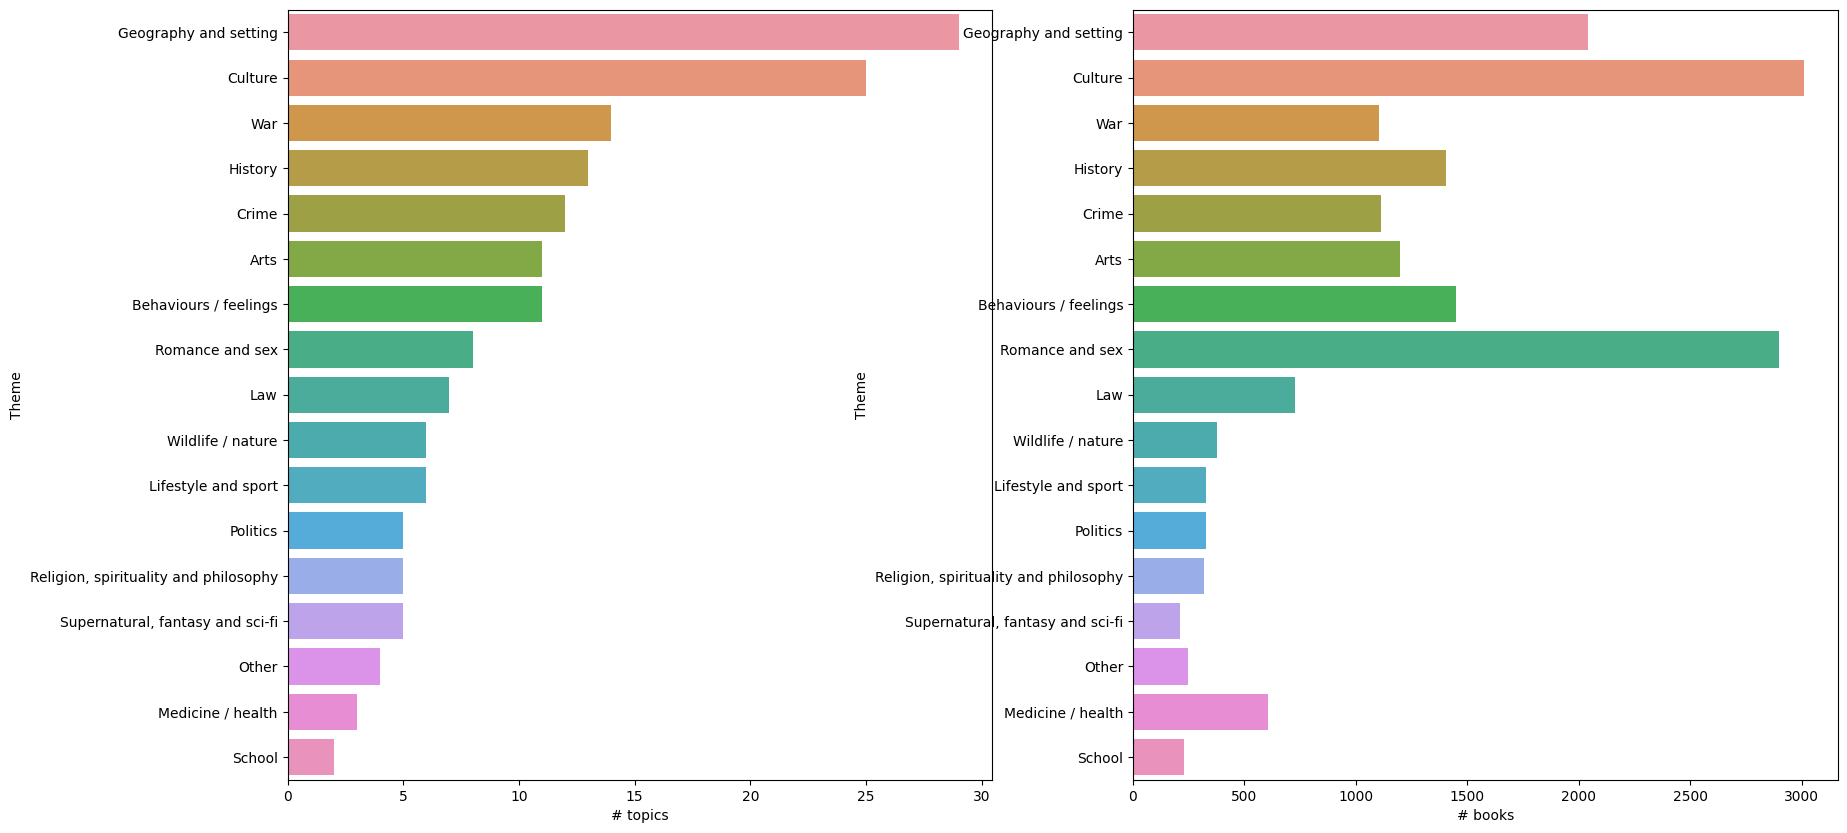

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2)

sns.barplot(data=theme_stats, y='Theme', x='# topics', ax=ax[0])
sns.barplot(data=theme_stats, y='Theme', x='# books', ax=ax[1])
#fig.tight_layout()
fig.set_size_inches(20, 10)

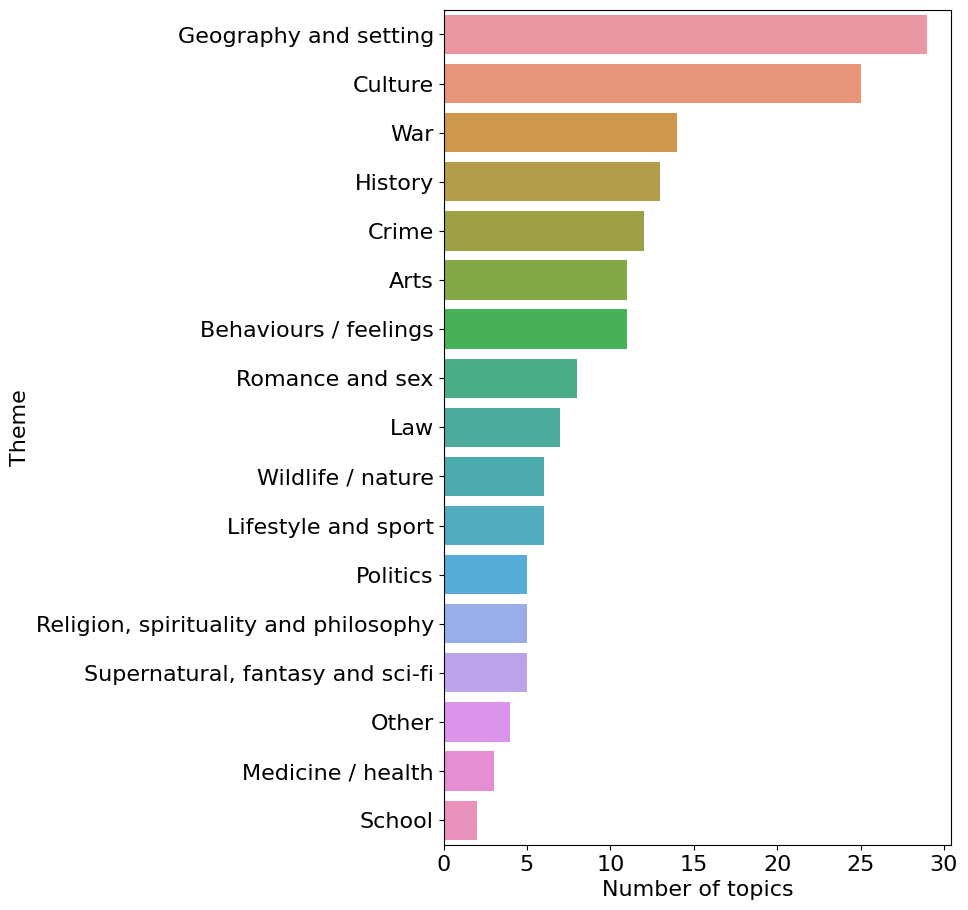

In [56]:
ax = sns.barplot(data=theme_stats, y='Theme', x='# topics')
ax.set_xlabel('Number of topics', fontsize=16)
ax.set_ylabel('Theme', fontsize=16)
ax.figure.tight_layout()
ax.figure.set_size_inches(10, 10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.figure.savefig('../images/theme_topics_dist.png', dpi=150)

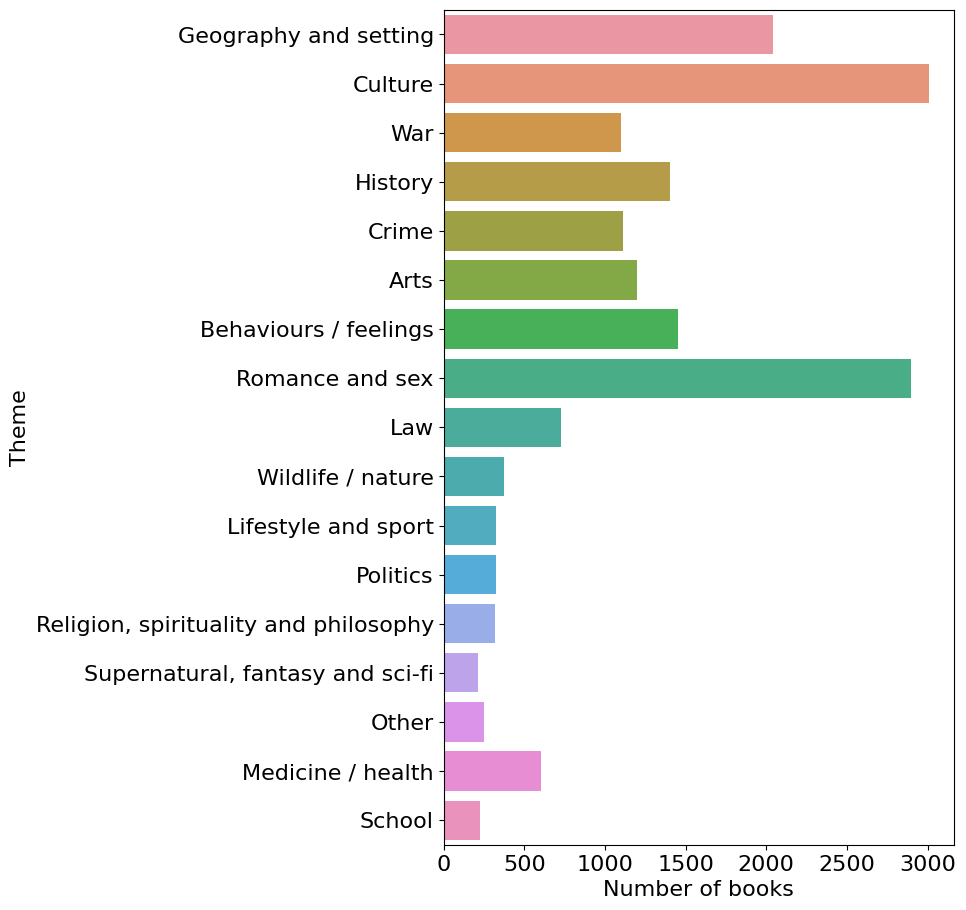

In [58]:
ax = sns.barplot(data=theme_stats, y='Theme', x='# books')
ax.set_xlabel('Number of books', fontsize=16)
ax.set_ylabel('Theme', fontsize=16)
ax.figure.tight_layout()
ax.figure.set_size_inches(10, 10)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.figure.savefig('../images/theme_books_dist.png', dpi=150)

# Document, Topic and Theme

In [21]:
import ast
import gzip
import os

data_dir = '../../../../impact-of-fiction/data'
topic_dir = os.path.join(data_dir, 'topic_models/novels-10921')
inference_file = os.path.join(topic_dir, 't2v_model-10921_novels.01_0.1.whole_book-topics.gz')

isbn_topic = {}

with gzip.open(inference_file, 'rt') as fh:
    for line in fh:
        isbn, _, scores = line.strip('\n').split('\t')
        print(scores)
        break
        scores = ast.literal_eval(scores)
        isbn_topic[isbn] = scores[0]
        

[(0.25899985, 50), (0.23359272, 62), (0.21462838, 85), (0.2086238, 22), (0.20741129, 23), (0.20372967, 7), (0.19600487, 27), (0.1862503, 33), (0.18379751, 87), (0.18283737, 48), (0.17924458, 41), (0.17587316, 34), (0.17503591, 2), (0.17425431, 31), (0.17156011, 89), (0.16817626, 55), (0.1676366, 75), (0.16703871, 6), (0.16578926, 86), (0.1635006, 37), (0.16257001, 71), (0.16195953, 20), (0.16055505, 84), (0.15920274, 79), (0.1539872, 70)]


In [20]:
isbn_topic_file = '../data/isbn_topic_scores.tsv.gz'

with gzip.open(isbn_topic_file, 'wt') as fh:
    fh.write("isbn\ttopic\tscore\tthemes\n")
    for isbn in isbn_topic:
        score, topic = isbn_topic[isbn]
        row_string = '\t'.join([str(isbn), str(topic), str(score), repr(topic_themes[topic])])
        fh.write(f"{row_string}\n")

In [18]:
topic_themes

defaultdict(list,
            {0: ['Romance and sex'],
             1: ['Romance and sex'],
             10: ['Romance and sex', 'Culture'],
             12: ['Romance and sex', 'Behaviours / feelings'],
             28: ['Romance and sex'],
             45: ['Romance and sex'],
             51: ['Romance and sex'],
             93: ['Romance and sex',
              'Behaviours / feelings',
              'Geography and setting'],
             21: ['Wildlife / nature', 'Culture', 'Geography and setting'],
             33: ['Wildlife / nature',
              'Culture',
              'Geography and setting',
              'Lifestyle and sport'],
             56: ['Wildlife / nature'],
             65: ['Wildlife / nature', 'Culture'],
             76: ['Wildlife / nature', 'War', 'Other'],
             90: ['Wildlife / nature', 'Lifestyle and sport'],
             2: ['Behaviours / feelings'],
             13: ['Behaviours / feelings', 'Arts', 'Culture'],
             20: ['Behaviours / f